Лабораторная работа 5.
Тестирование качества работы моделей машинного обучения

In [1]:
!pip install pytest


Визуализация датасетов, построение Clean и Noisy dataset

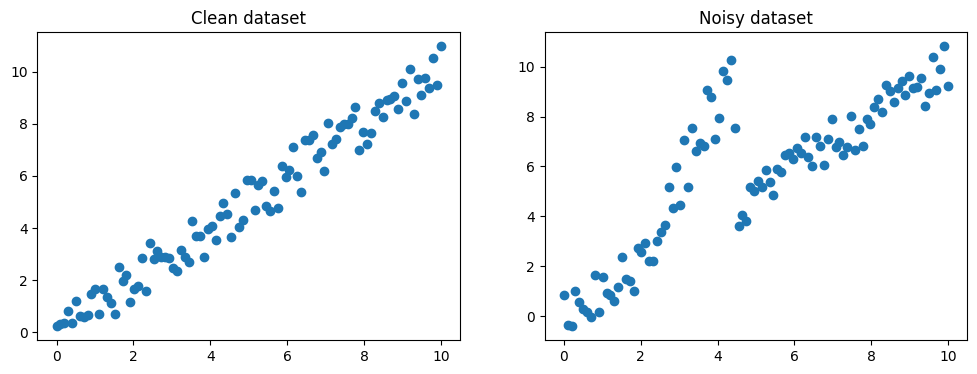

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Чистый датасет
xs = np.linspace(0, 10, 100)
ys = xs + np.random.random(100) * 2 - 1

# Шумный датасет
ys_noisy = xs + np.random.random(100) * 2 - 1
ys_noisy[25:45] *= 2  # добавляем шум

# Визуализация
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(xs, ys)
plt.title("Clean dataset")

plt.subplot(1, 2, 2)
plt.scatter(xs, ys_noisy)
plt.title("Noisy dataset")
plt.show()


Обучение модели и вывод MSE

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Обучение на чистом
model = LinearRegression().fit(xs.reshape(-1, 1), ys)
mse_clean = mean_squared_error(ys, model.predict(xs.reshape(-1, 1)))
print("MSE (clean dataset):", mse_clean)

# Обучение на шумном
model = LinearRegression().fit(xs.reshape(-1, 1), ys_noisy)
mse_noisy = mean_squared_error(ys_noisy, model.predict(xs.reshape(-1, 1)))
print("MSE (noisy dataset):", mse_noisy)


MSE (clean dataset): 0.3127464060142184
MSE (noisy dataset): 2.4022110628700686


Тесты

In [4]:
%%writefile test_model.py
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_dataset(noise=False):
    xs = np.linspace(0, 10, 100)
    ys = xs + np.random.random(100) * 2 - 1
    if noise:
        ys[25:45] *= 2
    return xs.reshape(-1, 1), ys

def test_clean_data():
    X, y = generate_dataset(noise=False)
    model = LinearRegression().fit(X, y)
    mse = mean_squared_error(y, model.predict(X))
    print("Clean MSE:", mse)
    assert mse < 1.5

def test_noisy_data():
    X, y = generate_dataset(noise=True)
    model = LinearRegression().fit(X, y)
    mse = mean_squared_error(y, model.predict(X))
    print("Noisy MSE:", mse)
    assert mse > 1.5


Writing test_model.py


 Запуск тестов

In [5]:
!pytest test_model.py -v


============================= test session starts ==============================
platform linux -- Python 3.11.12, pytest-8.3.5, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: typeguard-4.4.2, langsmith-0.3.43, anyio-4.9.0
collected 2 items                                                              

test_model.py::test_clean_data PASSED                                    [ 50%]
test_model.py::test_noisy_data PASSED                                    [100%]

============================== 2 passed in 1.28s ===============================
